In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt

In [41]:
h_pars = camb.set_params(H0 = 50, ombh2 = 0.015, omch2 = 0.03, lmax=10000)
h_pars.set_accuracy(AccuracyBoost=3.0)
h_results = camb.get_results(h_pars)
h_powers =h_results.get_cmb_power_spectra(h_pars, CMB_unit='muK')

h_lensed = (h_powers['total'][2:5000, 0])
h_unlensed = (h_powers['unlensed_total'][2:5000, 0])
h_l = h_lensed/h_unlensed

l_pars = camb.set_params(H0 = 50, ombh2 = 0.015, omch2 = 0.03, lmax=10000)
l_pars.set_accuracy(AccuracyBoost=1.0)
l_results = camb.get_results(l_pars)
l_powers =l_results.get_cmb_power_spectra(l_pars, CMB_unit='muK')

l_lensed = (l_powers['total'][2:5000, 0])
l_unlensed = (l_powers['unlensed_total'][2:5000, 0])
l_l = h_lensed/l_unlensed

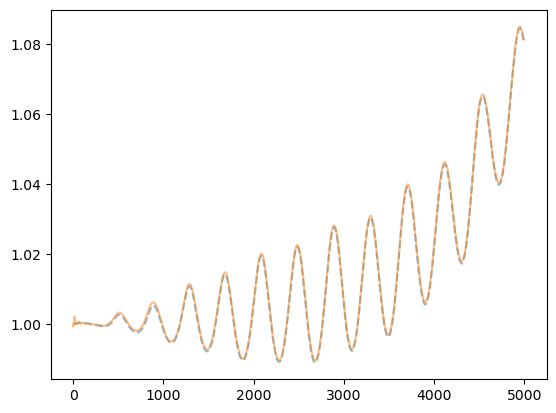

In [42]:
ells = np.array([l for l in range(2, 5000)])
plt.plot(ells, h_l, alpha = 0.5, linestyle = "dashed")
plt.plot(ells, l_l, alpha = 0.5)

In [23]:
params       = np.load('CL_data/parameter_test2.npy')
cls_unlensed = np.load('CL_data/unlensed_CL2.npy')
cls_lensed   = np.load('CL_data/lensed_CL2.npy')

print(np.max(params[:,0]), "max H0")      # planck: 67.4
print(np.max(params[:,1]), "max ombh2")   # planck: 0.0224
print(np.max(params[:,2]), "max omch2\n") # planck: 0.120

print(np.min(params[:,0]), "min H0")
print(np.min(params[:,1]), "min ombh2")
print(np.min(params[:,2]), "min omch2\n")

89.96133174247751 max H0
0.034954565494262284 max ombh2
0.07993298944816644 max omch2

50.08035477807815 min H0
0.015168520240756338 min ombh2
0.01637357744162045 min omch2



In [43]:
max_H0 = 95
min_H0 = 45

max_ombh2 = 0.04  #0.034
min_ombh2 = 0.01 #0.015

max_omch2 = 0.3 #0.18
min_omch2 = 0.02 #0.03


params       = []
cls_lensed   = []
cls_unlensed = []

n_data = 600

for i in range(n_data):
    print(f"running {i+1}/{600}")
    # generate params
    
    _H0    =    np.random.uniform(low = min_H0, high = max_H0)
    _ombh2 = np.random.uniform(low = min_ombh2, high = max_ombh2)
    _omch2 = np.random.uniform(low = min_omch2, high = max_omch2)
    
    params.append([_H0, _ombh2, _omch2])
    
    # run CAMB
    
    pars = camb.set_params(H0 = _H0, ombh2 = _ombh2, omch2 = _omch2, lmax=5000)
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    
    cls_lensed.append(powers['total'][2:5000, 0])
    cls_unlensed.append(powers['unlensed_total'][2:5000, 0])
    
params = np.array(params)
cls_lensed = np.array(cls_lensed)
cls_unlensed = np.array(cls_unlensed)

running 1/600
running 2/600
running 3/600
running 4/600
running 5/600
running 6/600
running 7/600
running 8/600
running 9/600
running 10/600
running 11/600
running 12/600
running 13/600
running 14/600
running 15/600
running 16/600
running 17/600
running 18/600
running 19/600
running 20/600
running 21/600
running 22/600
running 23/600
running 24/600
running 25/600
running 26/600
running 27/600
running 28/600
running 29/600
running 30/600
running 31/600
running 32/600
running 33/600
running 34/600
running 35/600
running 36/600
running 37/600
running 38/600
running 39/600
running 40/600
running 41/600
running 42/600
running 43/600
running 44/600
running 45/600
running 46/600
running 47/600
running 48/600
running 49/600
running 50/600
running 51/600
running 52/600
running 53/600
running 54/600
running 55/600
running 56/600
running 57/600
running 58/600
running 59/600
running 60/600
running 61/600
running 62/600
running 63/600
running 64/600
running 65/600
running 66/600
running 67/600
runn

In [44]:
np.save('CL_data/parameter_test10.npy', params)
np.save('CL_data/unlensed_CL10.npy', cls_unlensed)
np.save('CL_data/lensed_CL10.npy', cls_lensed)

In [5]:

#green curve:
pars = camb.set_params(H0 = 7.38497047e+01, ombh2 = 2.45341258e-02, omch2 = 1.18240805e-01, lmax=5000)

#orange curve:
pars = camb.set_params(H0 = 7.38497047e+01, ombh2 = 2.45341258e-02, omch2 = 1.18240805e-01, As = np.exp(3)/10e10, lmax=5000)



results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

cls_lensed2 = powers['total'][2:5000, 0]
cls_unlensed2 = powers['unlensed_total'][2:5000, 0]

print(np.exp(3)/(1e10))
print(2e-9)

2.008553692318767e-09
2e-09


In [6]:
np.set_printoptions(threshold=5000)
print(list(cls_lensed2))

[np.float64(110.77522658287758), np.float64(102.57997919843001), np.float64(95.18431434875835), np.float64(89.56984927278607), np.float64(85.55242742191837), np.float64(82.80294453598997), np.float64(80.95627369231416), np.float64(79.7951617537048), np.float64(79.17084246669613), np.float64(78.9225587840888), np.float64(79.07786246293219), np.float64(79.40604846556927), np.float64(79.89360539941406), np.float64(80.4450303594038), np.float64(81.22202274647765), np.float64(82.16673435806378), np.float64(82.82816615355173), np.float64(84.3765992465768), np.float64(85.46583104913886), np.float64(86.75289353028738), np.float64(88.17087845812527), np.float64(89.32231764599386), np.float64(90.54722727440503), np.float64(92.04165147980258), np.float64(93.36428598768605), np.float64(94.87745222531929), np.float64(96.37127640947278), np.float64(97.84909406408295), np.float64(99.58555631644398), np.float64(100.92227827575276), np.float64(102.59894926548692), np.float64(104.10310875638334), np.flo

In [7]:
wayne_plus_polynomial_init = [0.0396,                  -0.248,            13.6,           0.638,           1480,         -0.0606,            10.2,           0.553,           1.23,          0.0335,          0.0473,          0.0639,            0.5,             0.3,               2,             0.1,            -0.5,             0.5,             0.3,             1.2,           1200, -3.3]
